# Assignment 2 (C0854596)


## Data: Car Evaluation 
### For this activity, we will take a database that has evaluations of different models of cars based on multiple parameters like safety and number of doors. We will be performing Linear Regression, K Means Clustering and Finally Random Forest Classification.


### Step 1: Adding Libraries:

In [15]:
#Installing Category Encoders as we will use them later
import sys
!{sys.executable} -m pip install category_encoders

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

### Step 2: Adding Data, cleaning it and displaying the data: 

In [27]:
data = pd.read_csv('Downloads/car_evaluation.csv')
data.head()

,Buying Price,Maintainance Cost,Number of Doors,Number of Persons,Lug_Boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [28]:
# Chaning Column names to make them more accessible
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


data.columns = col_names

col_names

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [29]:
# Checking Missing Values


data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [52]:
#Using Encoder to convert Strings into Integers
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc


### Step 3: Linear Regression

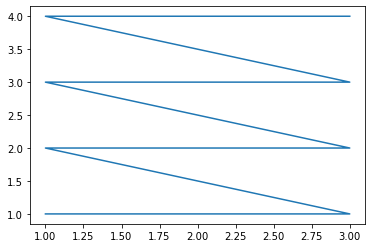

In [53]:
#Selecting Two Columns
x = data[['safety']].values
y = data[['buying']].values
plt.plot(x, y)
plt.xlabel('Safety')
plt.ylabel('Price');

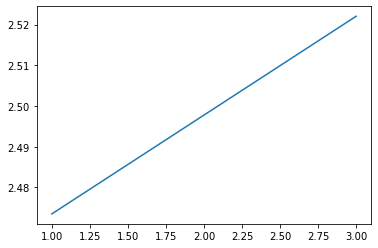

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predicted = regressor.predict(x_test)
plt.plot(x_test, predicted)

In [55]:
print(regressor.score(x_test,y_test))
data2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data2.head()

-0.002849603930528133


,Actual,Predicted
0,4,2.473497
1,1,2.497777
2,1,2.522056
3,2,2.522056
4,1,2.497777


<AxesSubplot:>

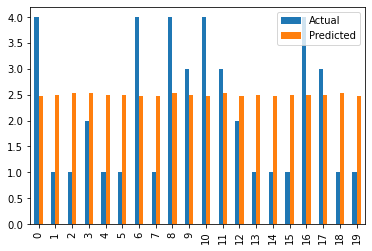

In [56]:
graph = data2.head(20)
graph.plot(kind='bar')

#### Our Linear Regression Analysis confirms that there is a direct relation between safety and price, however there are not much insights available. 

### Step 4: K Means

In [57]:
X = data.loc[:, ['buying', 'maint', 'safety']]

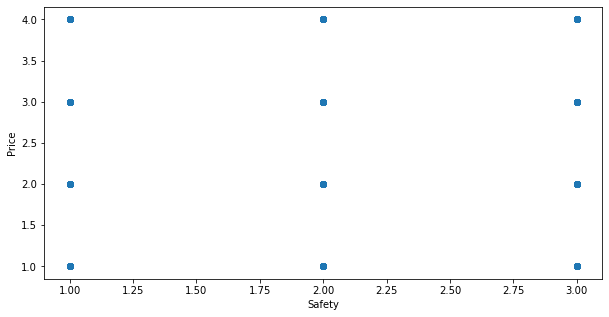

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(x= X['safety'], y=X['buying'])
plt.xlabel('Safety')
plt.ylabel('Price');

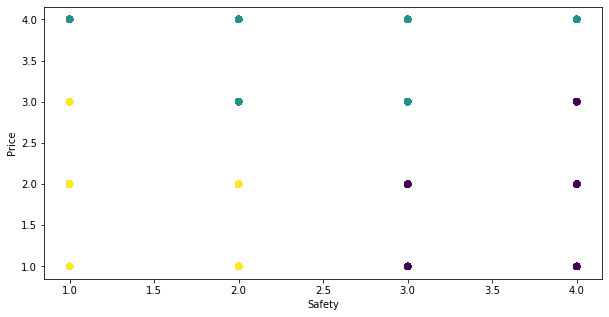

In [59]:
km = KMeans(n_clusters = 3)
km.fit(X)
plt.figure(figsize=(10,5))
plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)
plt.xlabel('Safety')
plt.ylabel('Price');

#### Our K Means Analysis shows that there are categories of cars, high safety cars are higher in cost which are indicated by the cyan colour on top right, low safety cars have lower price indicated by yellow on bottom left.
#### However, we need to determine which feature has what impact on the cost of car, for which we will conduct random forest classification

### Step 5: Random Forest Classification

In [60]:
# Dropping the Column Class as it is not usable for our analysis. 
X = data.drop(['class'], axis=1)

y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [61]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,2,3
1201,3,4,1,2,2,2
628,2,2,4,1,3,2
1498,4,2,4,2,2,2
1263,3,4,3,3,2,1


In [62]:
# Using Random Forest Classifier with Random States
RandomF = RandomForestClassifier(random_state=0)
RandomF.fit(X_train, y_train)
y_pred = RandomF.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9667


In [63]:
#Using Random Forest Classifier with Estimators to find out important features of car
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [67]:
#Calculating Feature Scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)


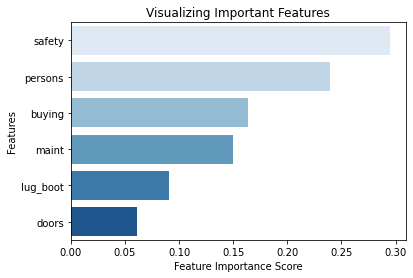

In [69]:
#Plotting the scores for better visualization and understanding. 
sns.barplot(x=feature_scores, y=feature_scores.index, palette = "Blues")


plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Here we can see that the safety is the most important factor, it is the most important feature in the car and it increases the price. 